In [ ]:
import pandas as pd


path_df = '../data/loan_approval_dataset.csv'
df = pd.read_csv(path_df)

# df
df.columns = list(df.columns)
df.columns = df.columns.str.strip()
# loại bỏ khoảng trắng giữa các giá trị trong dataframe
df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)
df
df.education.unique()

/tmp/ipykernel_2954/2187016214.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)


array(['Graduate', 'Not Graduate'], dtype=object)

## Tạo label - Gán nhãn cho dữ liệu kiểu phân loại 
* Đặc trưng cần dán nhãn **education** , **self_employed**, **loan_status**

In [77]:
# Tạo label cho các giá trị cần gán nhãn

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cat_colums = ['education', 'self_employed']
mapping_dict = {}
for i in cat_colums:
    label_encoder.fit(df[i])
    classes = label_encoder.classes_
    print(f'classes: {classes}')
    encoded = label_encoder.transform(classes)
    print(f'encoded: {encoded}')
    df[i] = label_encoder.fit_transform(df[i])
    
    mapping = [{cls : enc} for cls, enc in zip(classes,encoded)]
    # mapping = list(dict(zip(classes,encoded)))
    # print(dict(zip(classes,encoded)))
    mapping_dict[i] = mapping


df.loan_status = df.loan_status.map({
    'Approved': 1,
    'Rejected':0
})

print(mapping_dict)


classes: ['Graduate' 'Not Graduate']
encoded: [0 1]
classes: ['No' 'Yes']
encoded: [0 1]
{'education': [{'Graduate': np.int64(0)}, {'Not Graduate': np.int64(1)}], 'self_employed': [{'No': np.int64(0)}, {'Yes': np.int64(1)}]}


In [78]:
mapping_dict.__format__
print(mapping_dict)

{'education': [{'Graduate': np.int64(0)}, {'Not Graduate': np.int64(1)}], 'self_employed': [{'No': np.int64(0)}, {'Yes': np.int64(1)}]}


In [89]:
df = df.drop('loan_id',axis=1)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-0.294102,0,0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1
1,-1.473548,1,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0
2,0.295621,0,0,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,0
3,0.295621,0,0,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,0
4,1.475067,1,1,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.475067,0,1,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213,0
4265,-1.473548,1,1,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732,1
4266,-0.294102,1,0,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907,0
4267,-0.883825,1,0,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341,1


## Tạo heatmap

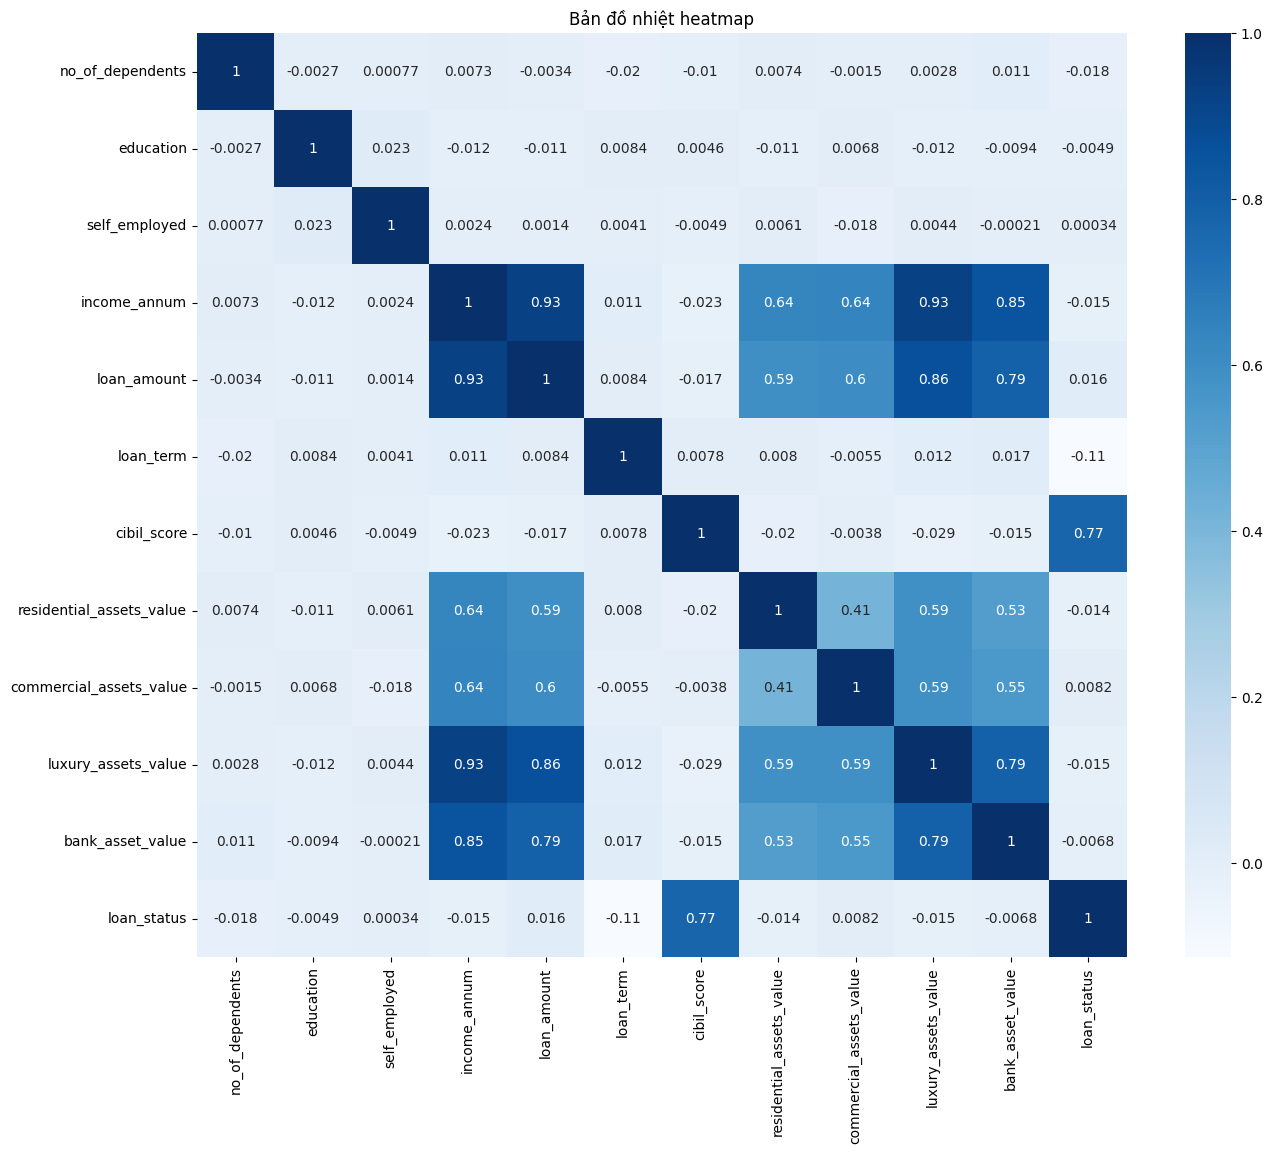

In [90]:
# Tạo correlation
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.corr()
corr
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.title('Bản đồ nhiệt heatmap')
plt.show()


In [91]:
corr

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114
education,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,-0.004918
self_employed,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,0.000345
income_annum,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189
loan_amount,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150
loan_term,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036
cibil_score,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518
residential_assets_value,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367
commercial_assets_value,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246
luxury_assets_value,0.002817,-0.012471,0.004413,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,-0.015465


## Scale các giá trị bị lệch về kích thước 

In [82]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


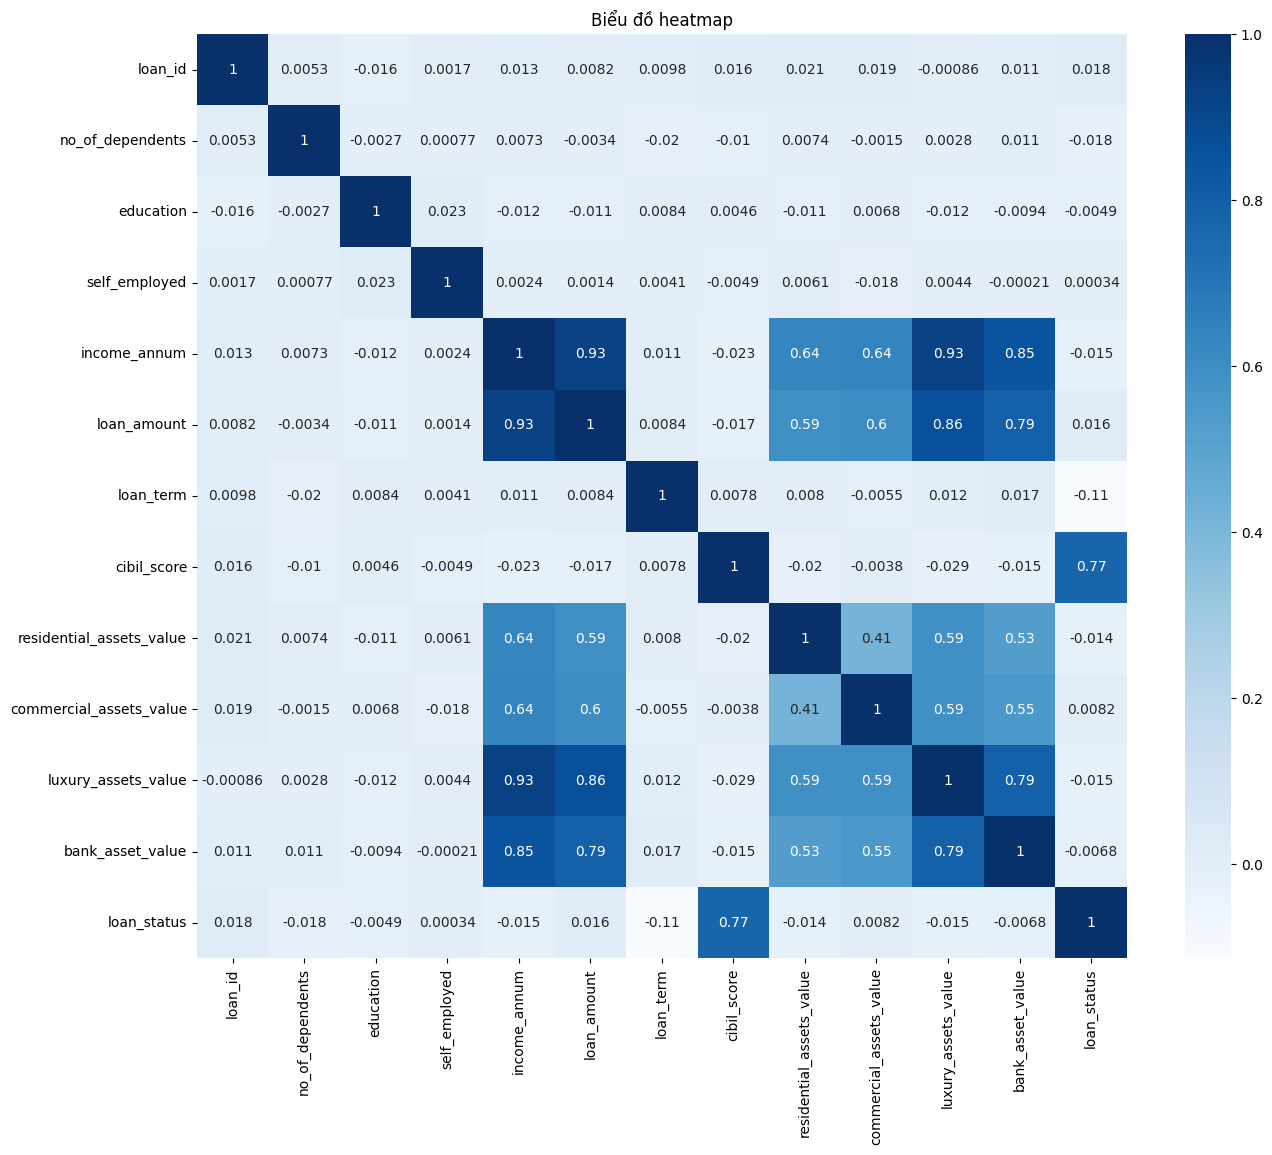

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo correlation cho DataFrame
corr_scaler = df.corr()

# Thực hiện tạo heatmap để so sánh tương quan
plt.figure(figsize=(15,12))
sns.heatmap(corr_scaler,cmap='Blues',annot=True)
plt.title("Biểu đồ heatmap")
plt.show()

* Sau khi quan sát, ta thấy các cột cần phải thực hiện quy đổi tỷ lệ của các giá trị có đơn vị lệch nhau 

-> Ta thấy giá trị tại cột income_annum, loan_term có giá trị đơn vị hàng triệu trong khi loan_term có giá trị hàng đơn vị

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                      'bank_asset_value']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,-0.294102,0,0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1
1,2,-1.473548,1,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0
2,3,0.295621,0,0,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,0
3,4,0.295621,0,0,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,0
4,5,1.475067,1,1,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,1.475067,0,1,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213,0
4265,4266,-1.473548,1,1,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732,1
4266,4267,-0.294102,1,0,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907,0
4267,4268,-0.883825,1,0,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341,1


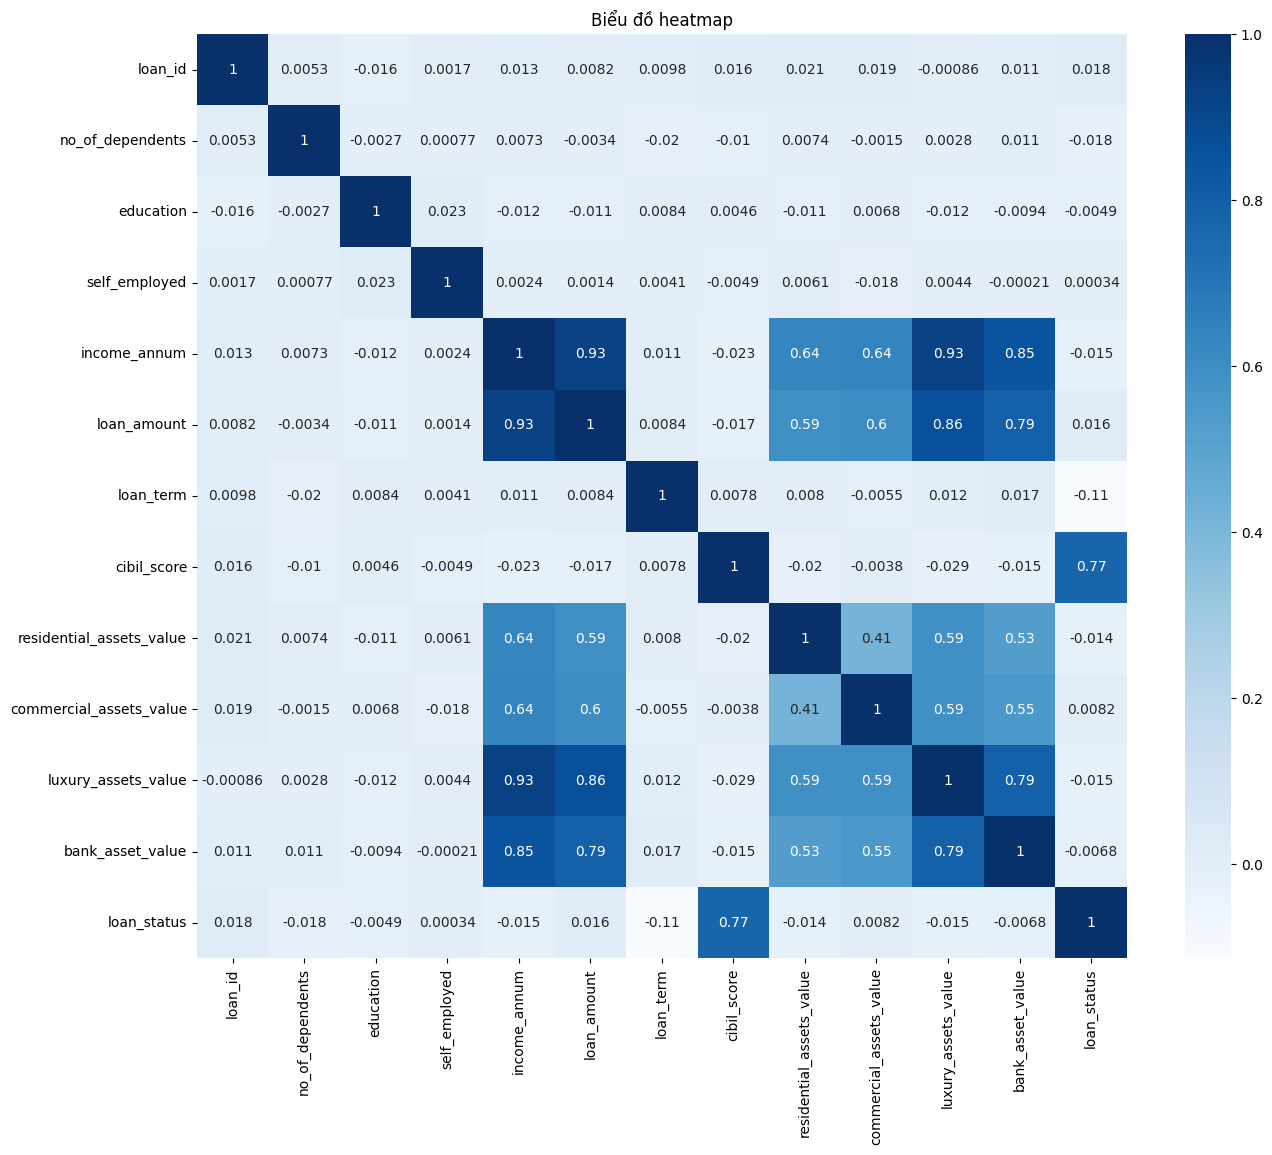

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo correlation cho DataFrame
corr_scaler = df.corr()

# Thực hiện tạo heatmap để so sánh tương quan
plt.figure(figsize=(15,12))
sns.heatmap(corr_scaler,cmap='Blues',annot=True)
plt.title("Biểu đồ heatmap")
plt.show()

